In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install openpyxl

In [3]:
df=pd.read_csv('dataset.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [4]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   

In [6]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [7]:
df.shape

(308854, 19)

In [8]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

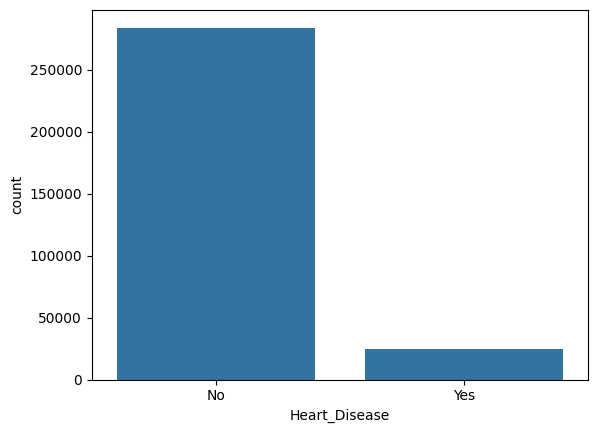

In [10]:
# Target distribution
sns.countplot(x='Heart_Disease', data=df)
plt.show()

In [13]:
## It is  an imbalanced data, this matters for evaluation metrics and model training

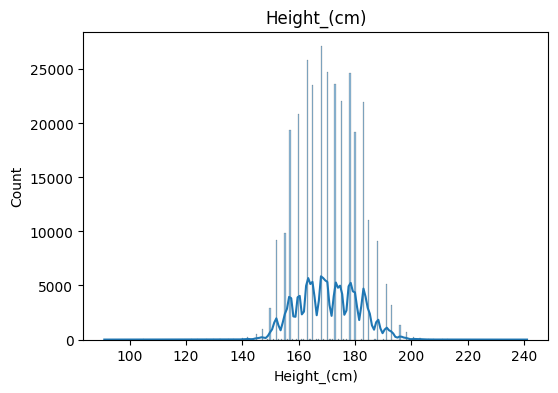

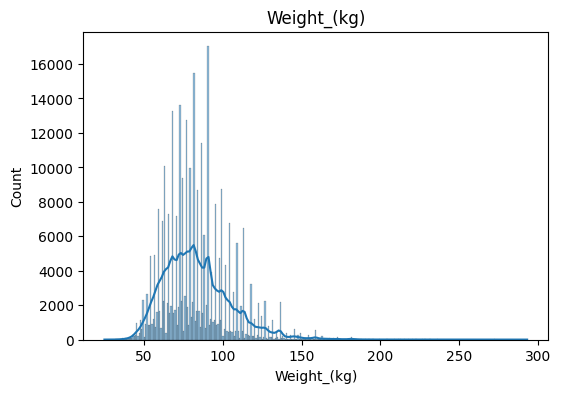

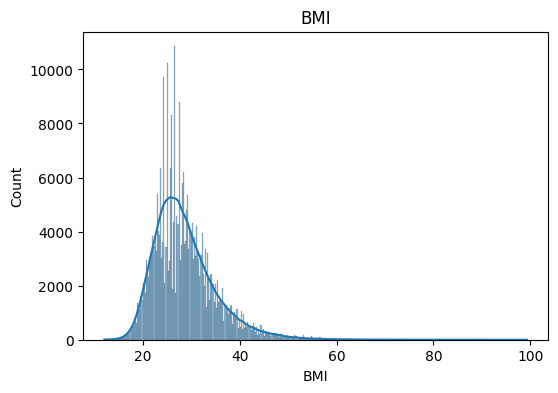

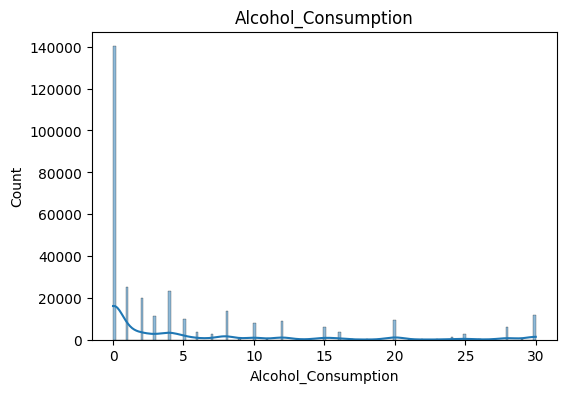

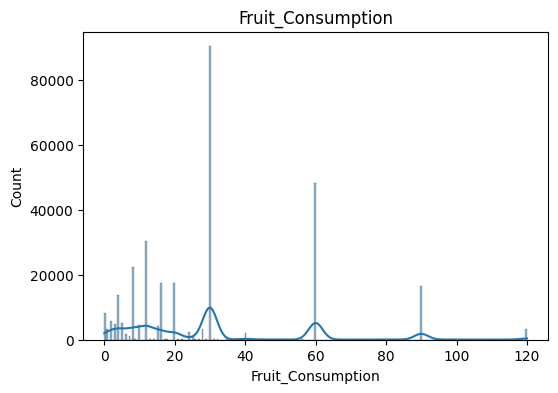

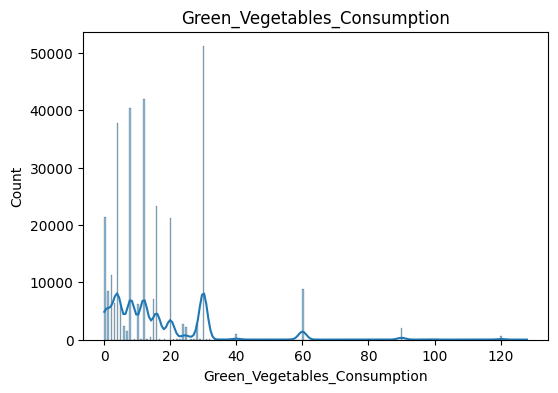

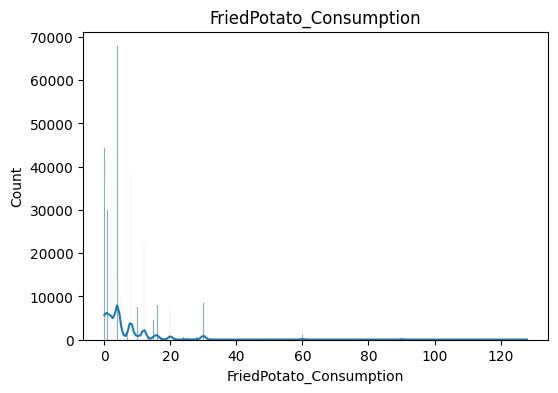

In [11]:
# For numeric features: histograms, boxplots
numeric_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

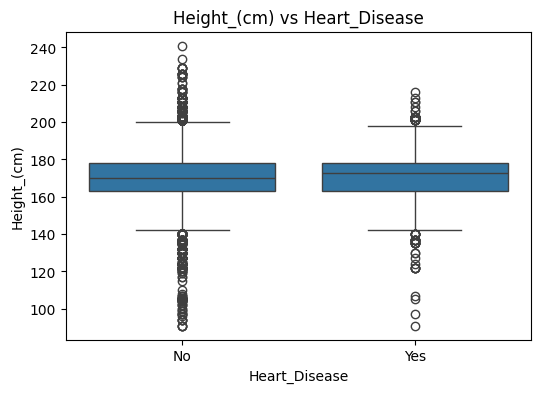

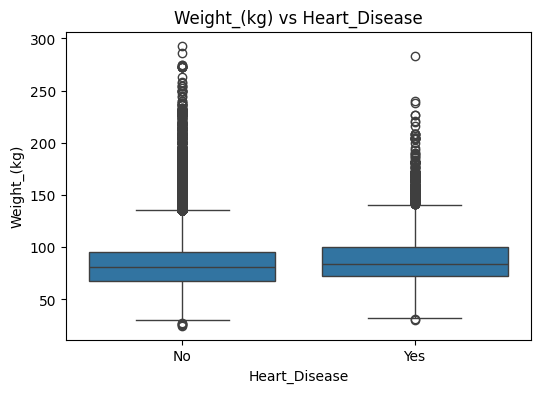

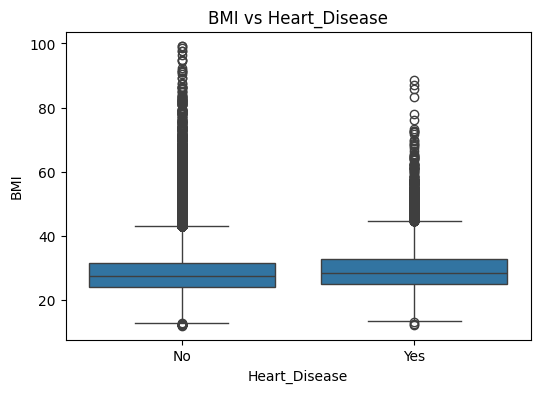

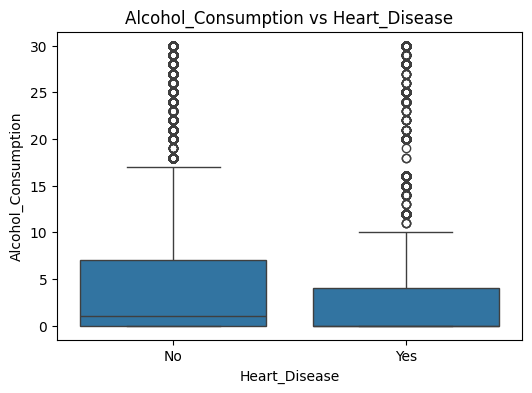

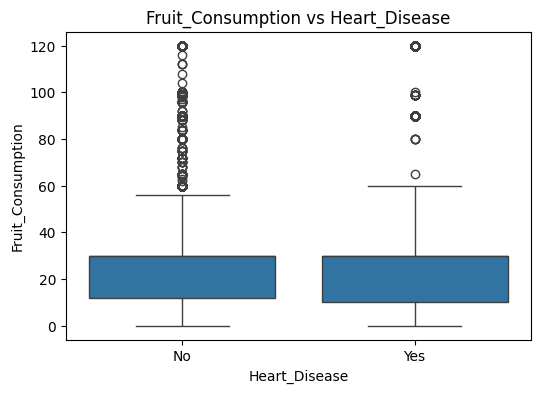

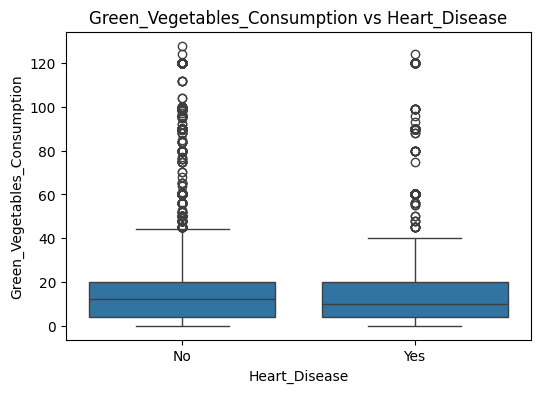

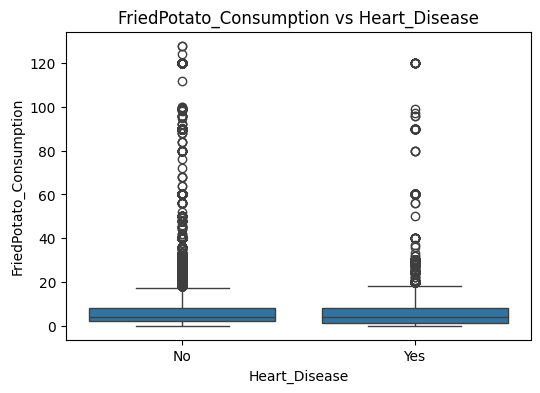

In [12]:
# Boxplots of numeric vs target
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Heart_Disease', y=col, data=df)
    plt.title(f'{col} vs Heart_Disease')
    plt.show()

In [14]:
# Encode binary columns (Yes/No --> 1/0)
binary_cols=['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History', 'Heart_Disease']
df[binary_cols]=df[binary_cols].replace({'Yes':1,'No':0})

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\2706397625.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols]=df[binary_cols].replace({'Yes':1,'No':0})


In [15]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,0,0,Male,80+,191,88.45,24.37,1,0,8,4,0


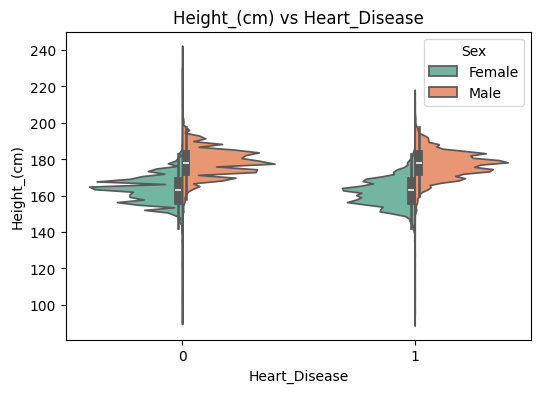

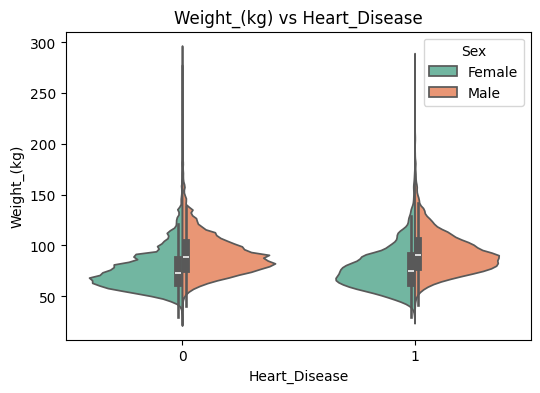

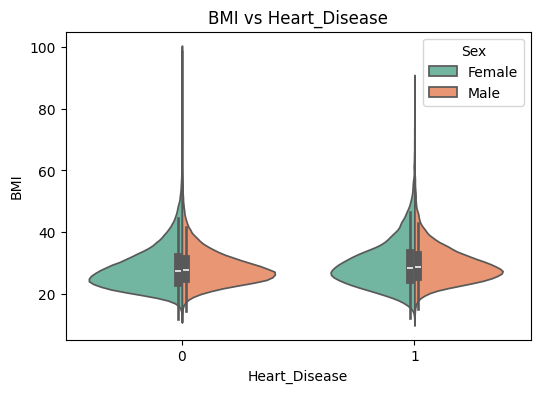

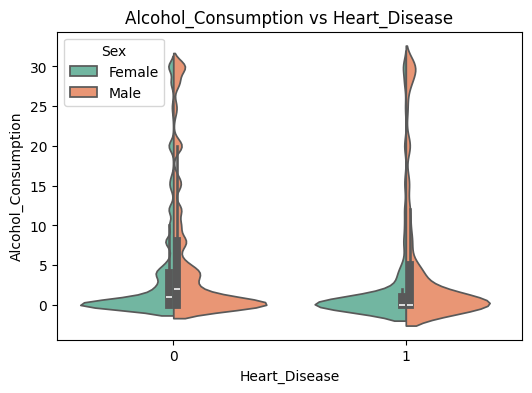

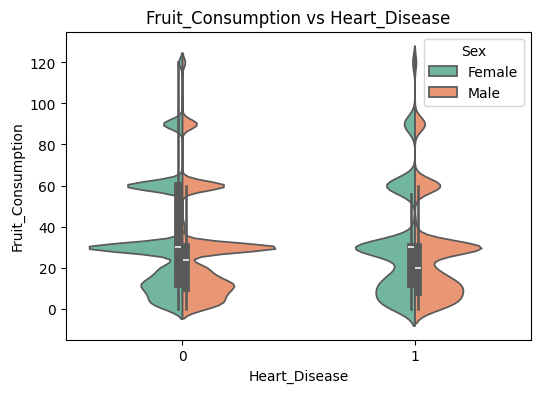

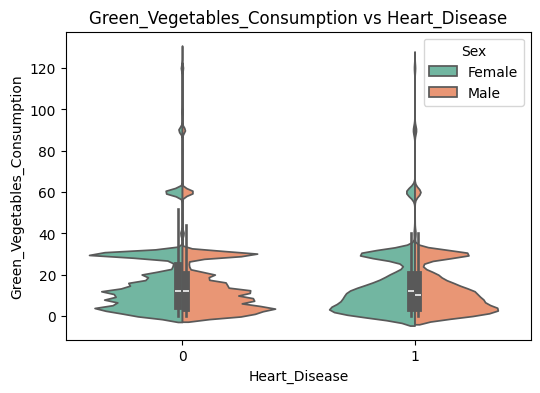

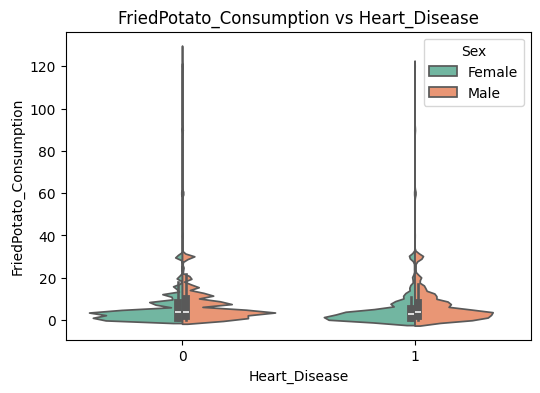

In [29]:
# Violin Plots of numeric vs target
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Heart_Disease', y=col, data=df, inner='box', split=True, hue='Sex', palette='Set2')
    plt.title(f'{col} vs Heart_Disease')
    plt.show()

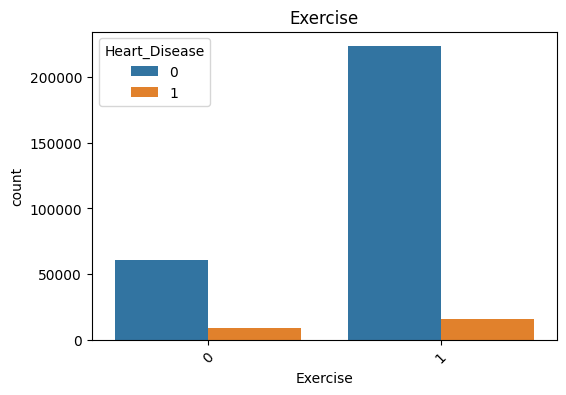

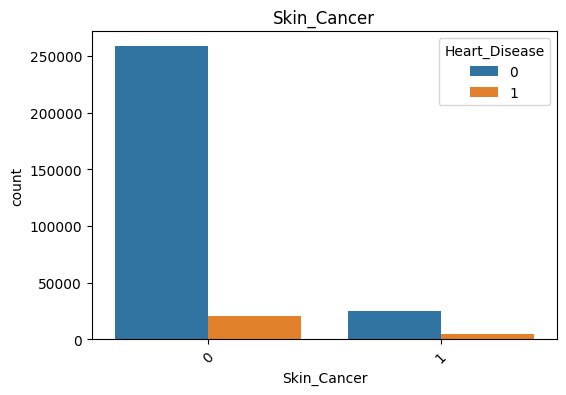

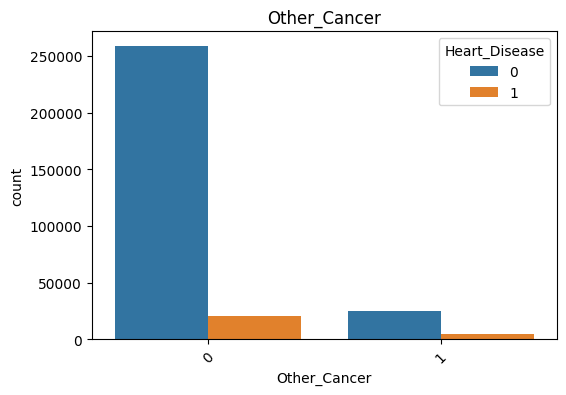

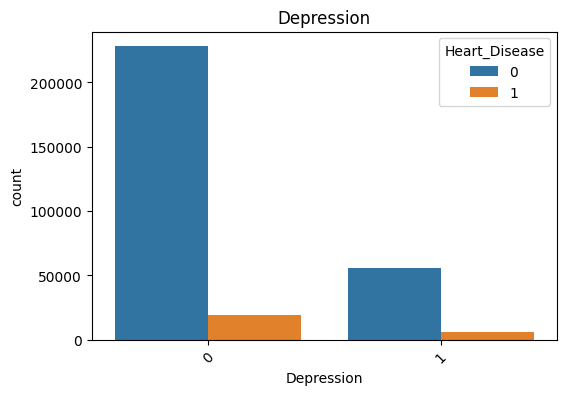

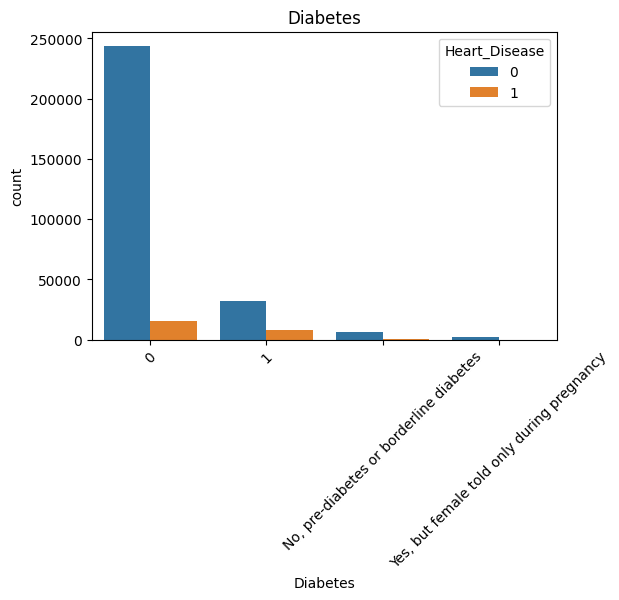

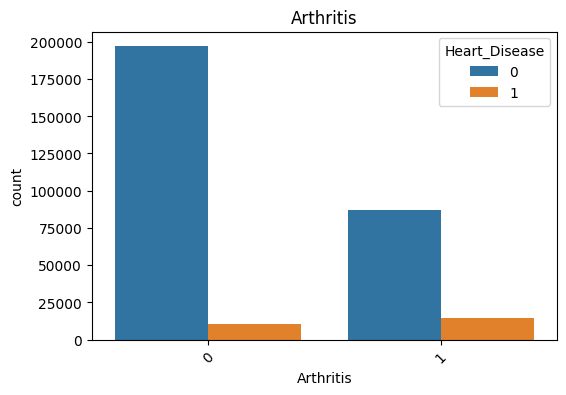

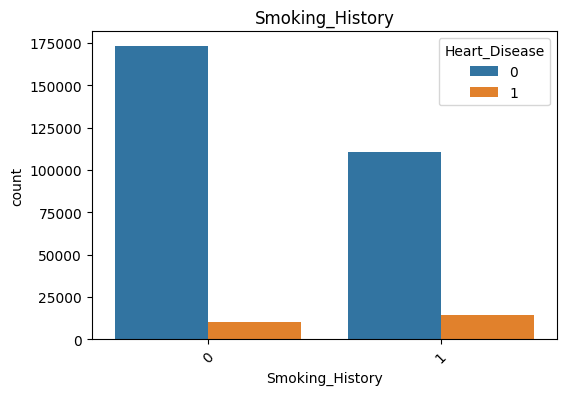

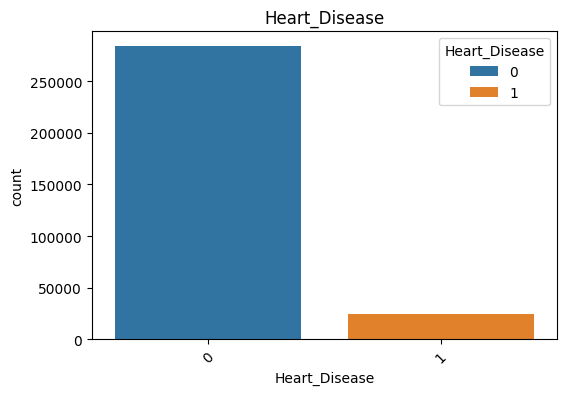

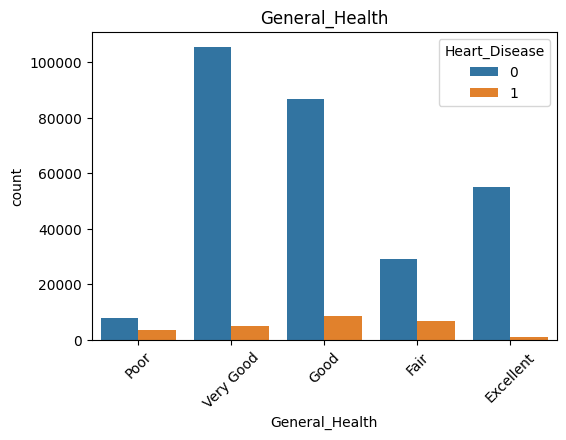

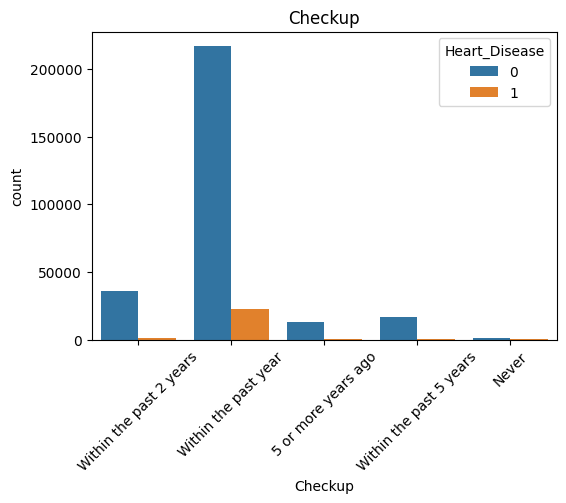

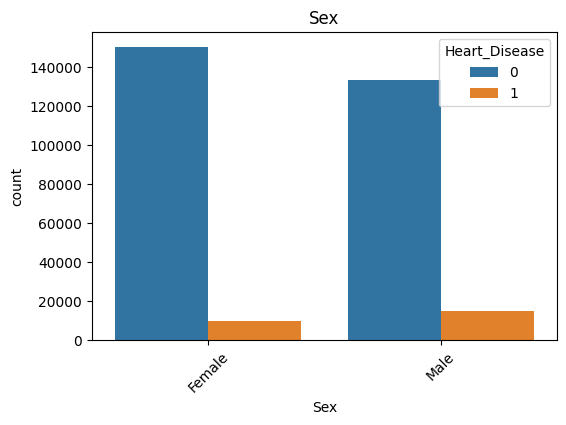

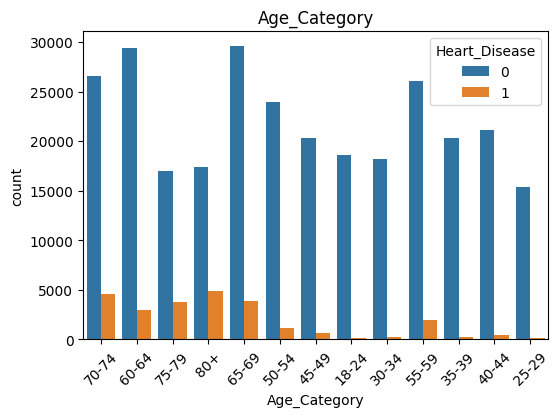

In [19]:
# Categorical features: counts, category vs target
cat_cols = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History', 'Heart_Disease','General_Health', 'Checkup', 'Sex', 'Age_Category']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Heart_Disease', data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


In [36]:
# Summary table for categorical data
summary = []
for col in cat_cols:
    dist = df.groupby(col)['Heart_Disease'].mean()  # Heart_Disease = 1 is positive class
    summary.append({
        'Feature': col,
        'Max_Rate': dist.max(),
        'Min_Rate': dist.min(),
        'Range': dist.max() - dist.min(),
        'Predictive?': 'Yes' if dist.max() - dist.min() > 0.1 else 'Maybe'
    })

pd.DataFrame(summary).sort_values('Range', ascending=False)

,Feature,Max_Rate,Min_Rate,Range,Predictive?
7,Heart_Disease,1.000000,0.000000,1.000000,Yes
8,General_Health,0.317889,0.019927,0.297962,Yes
11,Age_Category,0.218041,0.005032,0.213010,Yes
4,Diabetes,0.208509,0.036281,0.172227,Yes
5,Arthritis,0.141010,0.051587,0.089422,Maybe
2,Other_Cancer,0.157808,0.072608,0.085200,Maybe
1,Skin_Cancer,0.156365,0.072728,0.083636,Maybe
9,Checkup,0.094560,0.025482,0.069078,Maybe
0,Exercise,0.129604,0.066701,0.062903,Maybe
6,Smoking_History,0.116426,0.056577,0.059849,Maybe


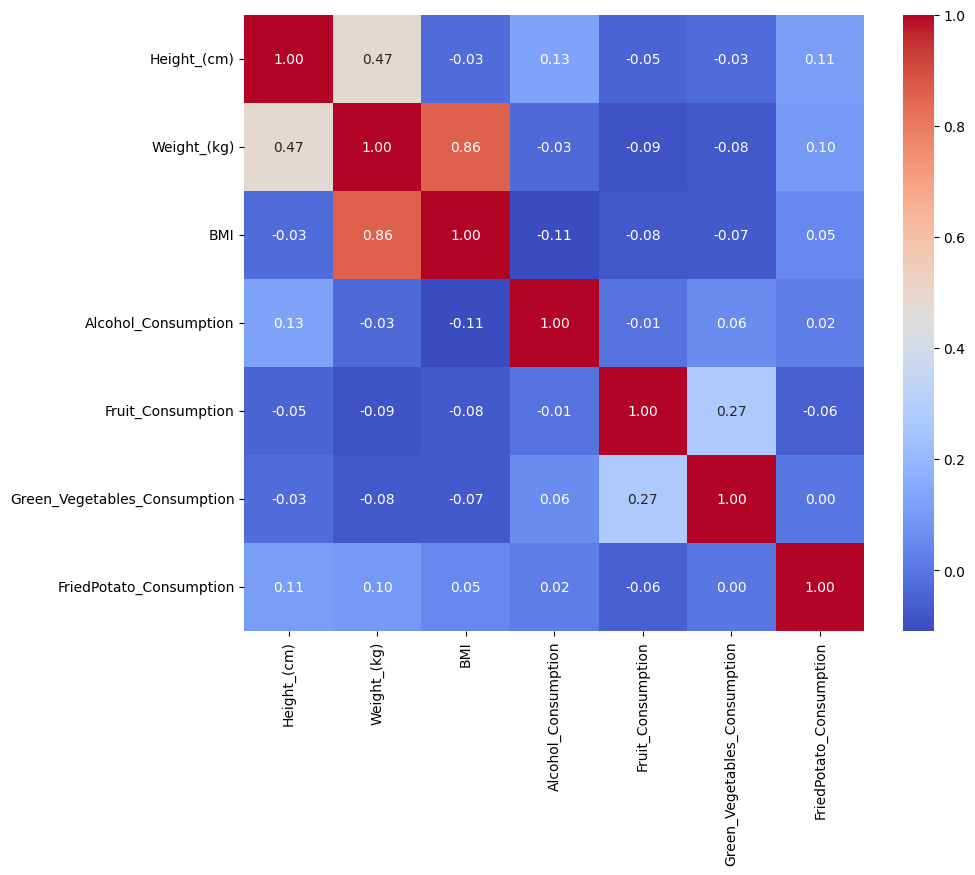

In [21]:
# Correlation heatmap for numeric features
corr=df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f',cmap='coolwarm')
plt.show()

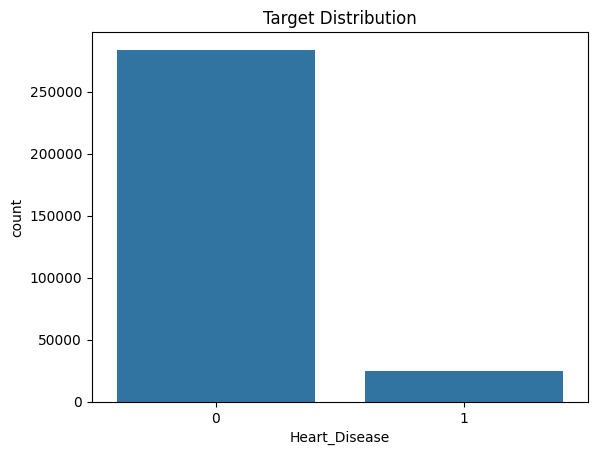

Heart_Disease
0    0.91915
1    0.08085
Name: proportion, dtype: float64


In [22]:
# summarize class imbalance
sns.countplot(x='Heart_Disease', data=df)
plt.title('Target Distribution')
plt.show()

print(df['Heart_Disease'].value_counts(normalize=True))

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')


<Figure size 1600x3500 with 0 Axes>

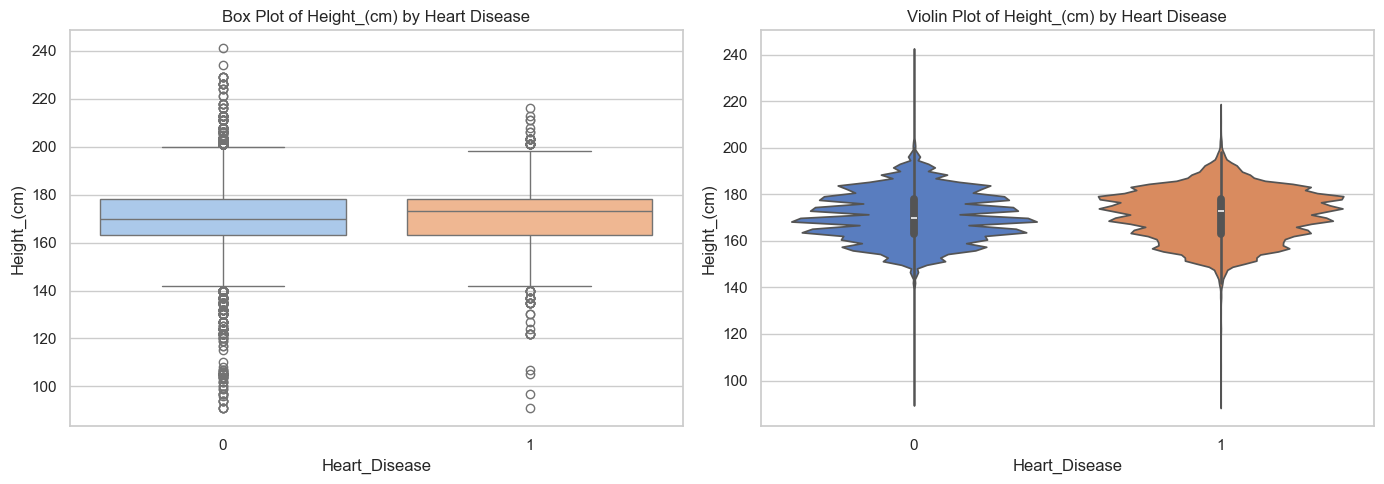

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')


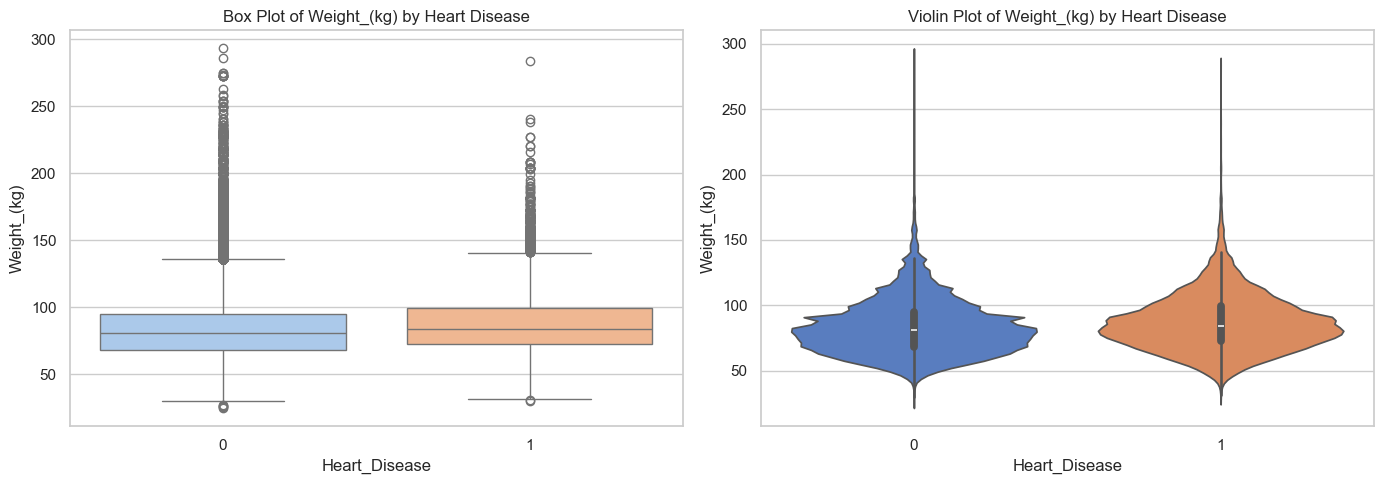

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')


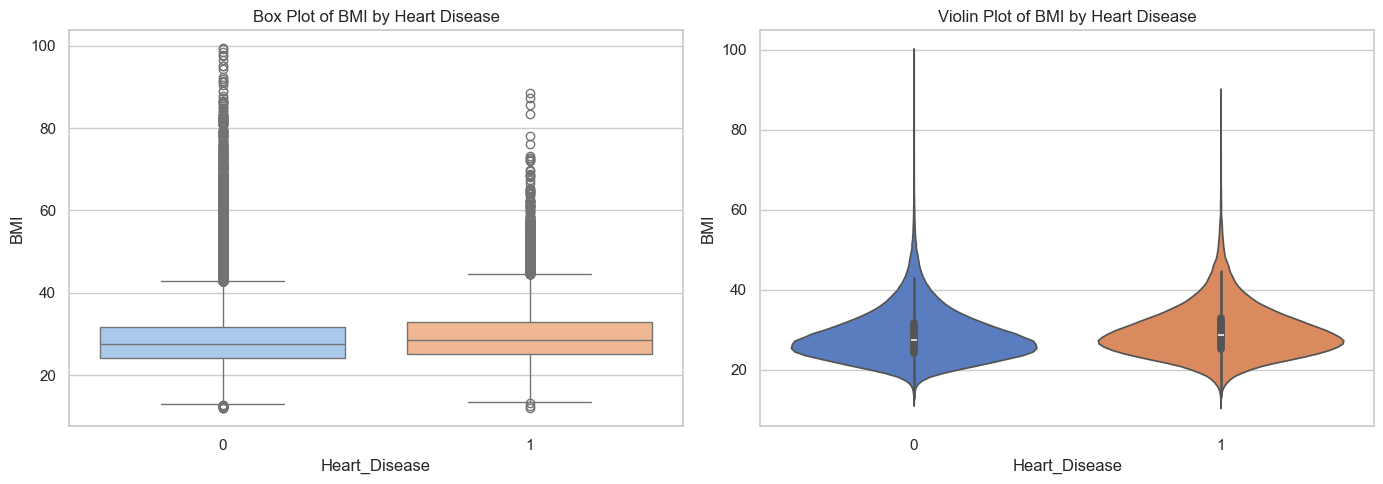

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')


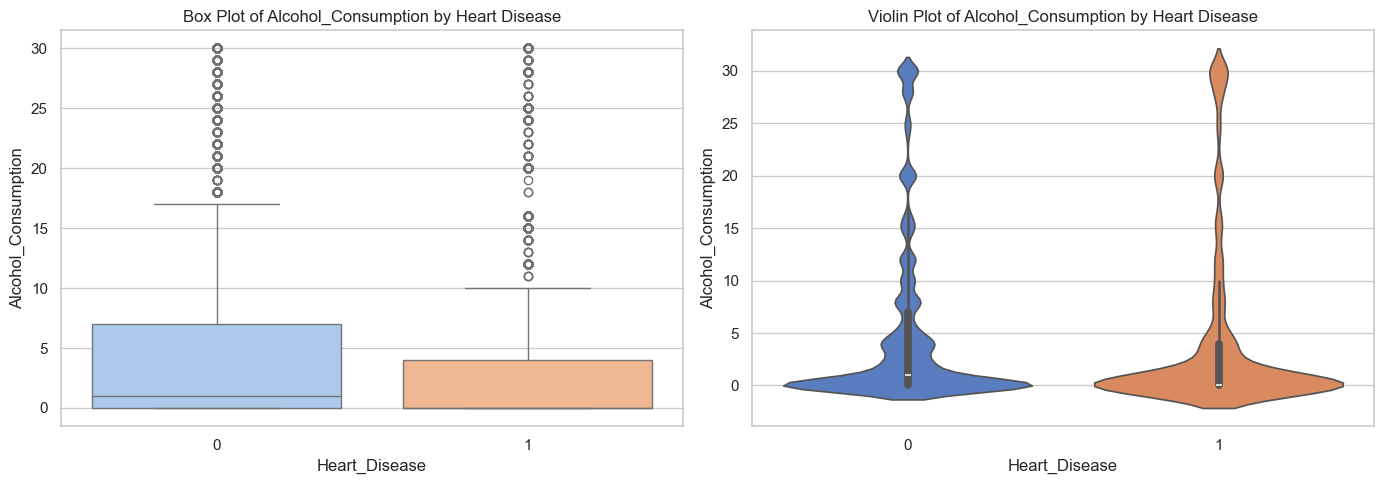

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')


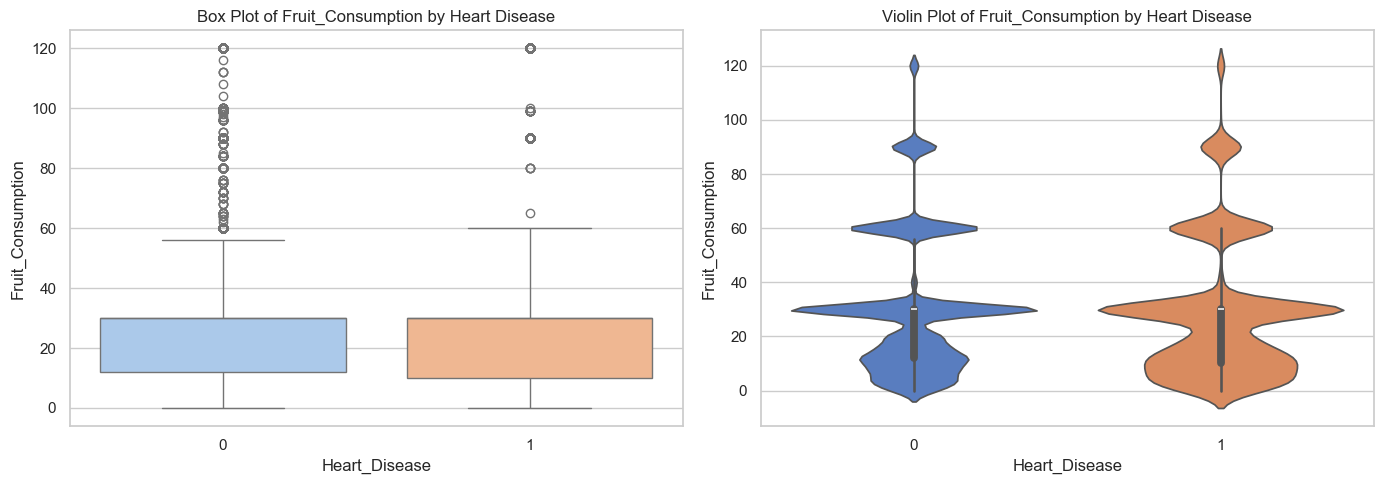

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')


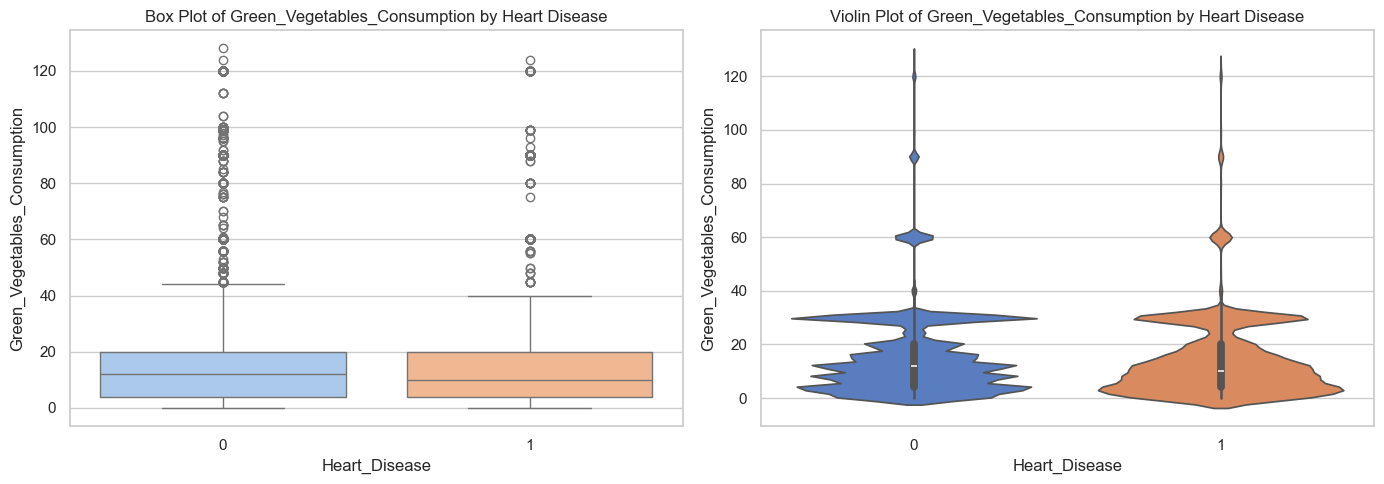

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\1841702698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')


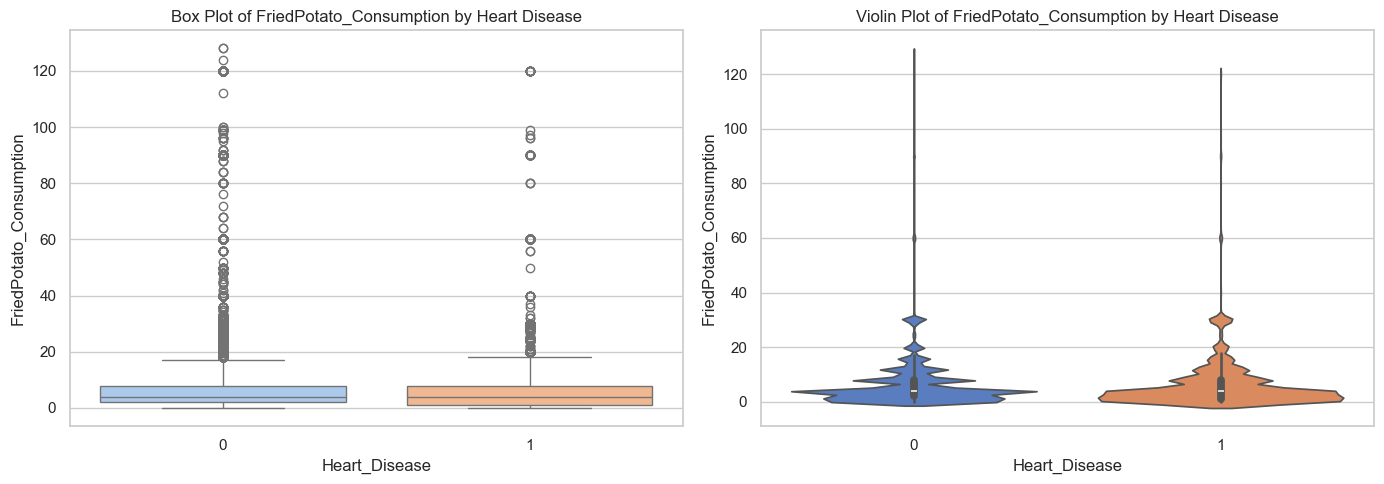

In [31]:
# Set up plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, len(numeric_cols) * 5))

# Loop through each feature and create box + violin plot side by side
for i, col in enumerate(numeric_cols):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # Box Plot
    sns.boxplot(x='Heart_Disease', y=col, data=df, ax=axs[0], palette='pastel')
    axs[0].set_title(f'Box Plot of {col} by Heart Disease')
    
    # Violin Plot
    sns.violinplot(x='Heart_Disease', y=col, data=df, ax=axs[1], inner='box', palette='muted')
    axs[1].set_title(f'Violin Plot of {col} by Heart Disease')
    
    plt.tight_layout()
    plt.show()


C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')


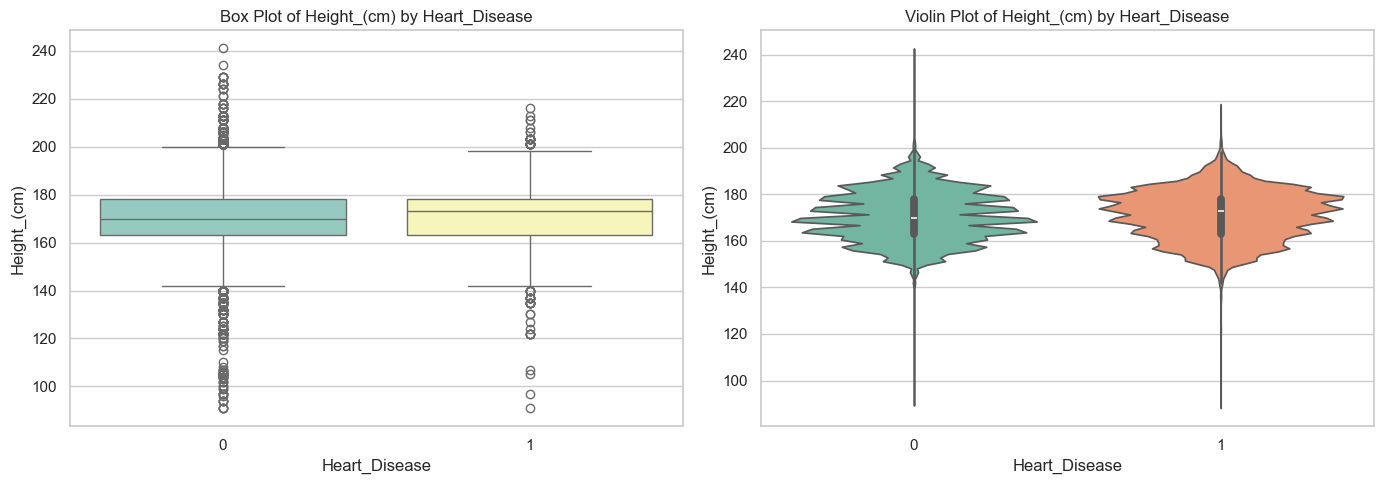

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')


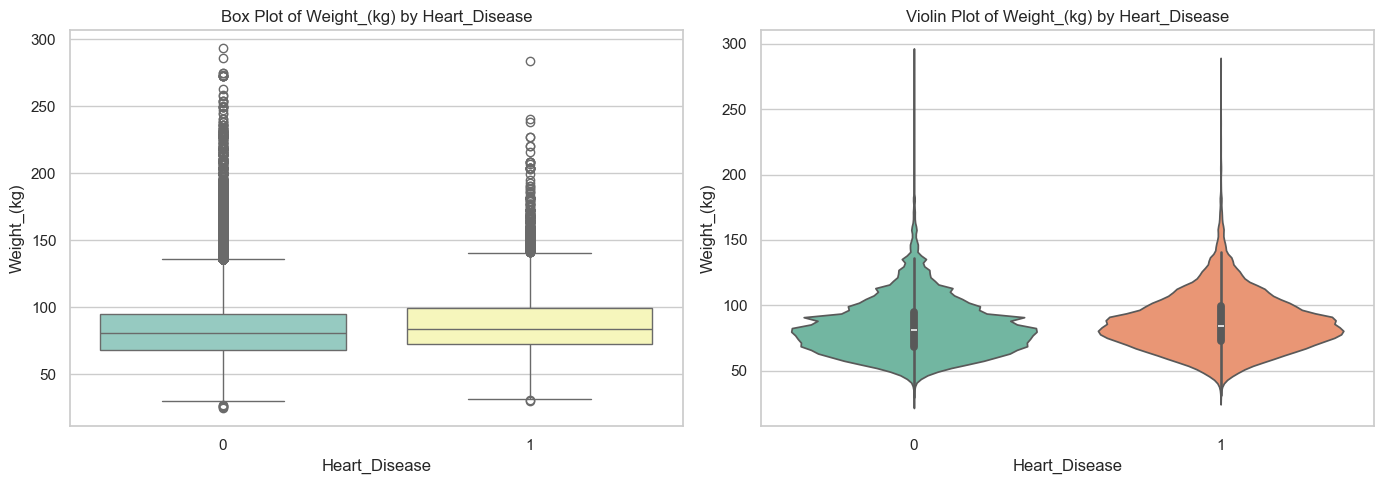

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')


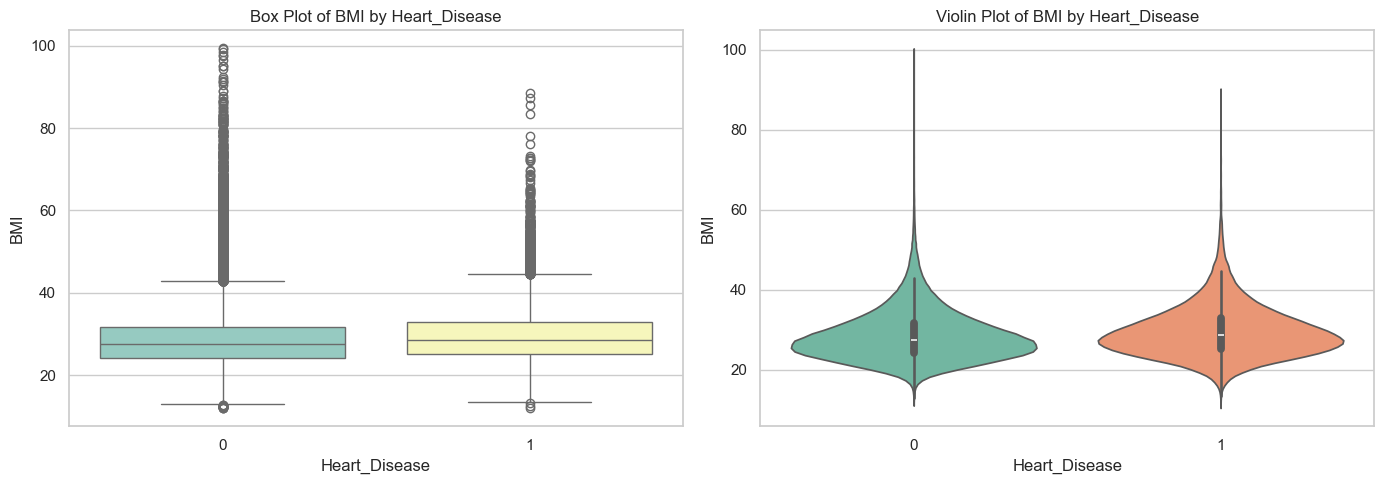

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')


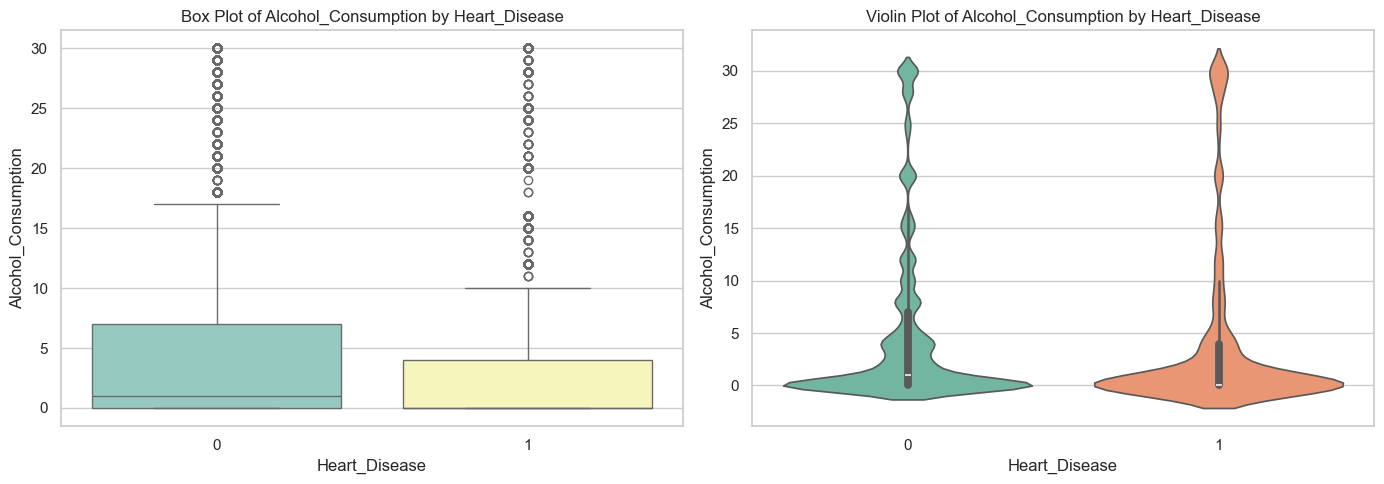

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')


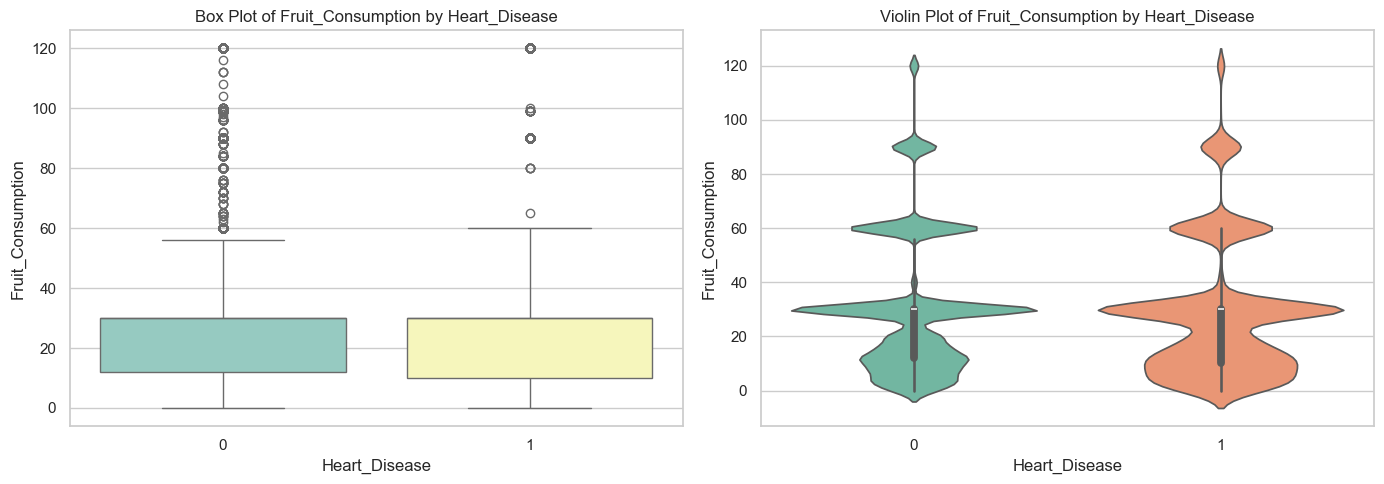

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')


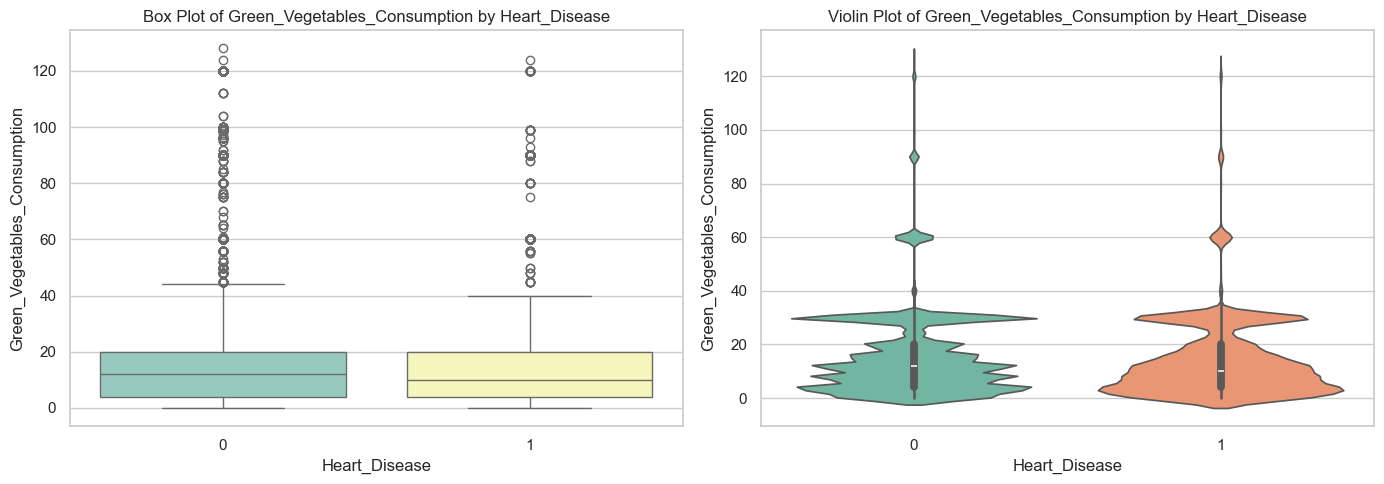

C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
C:\Users\jsrri\AppData\Local\Temp\ipykernel_7384\3348547286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')


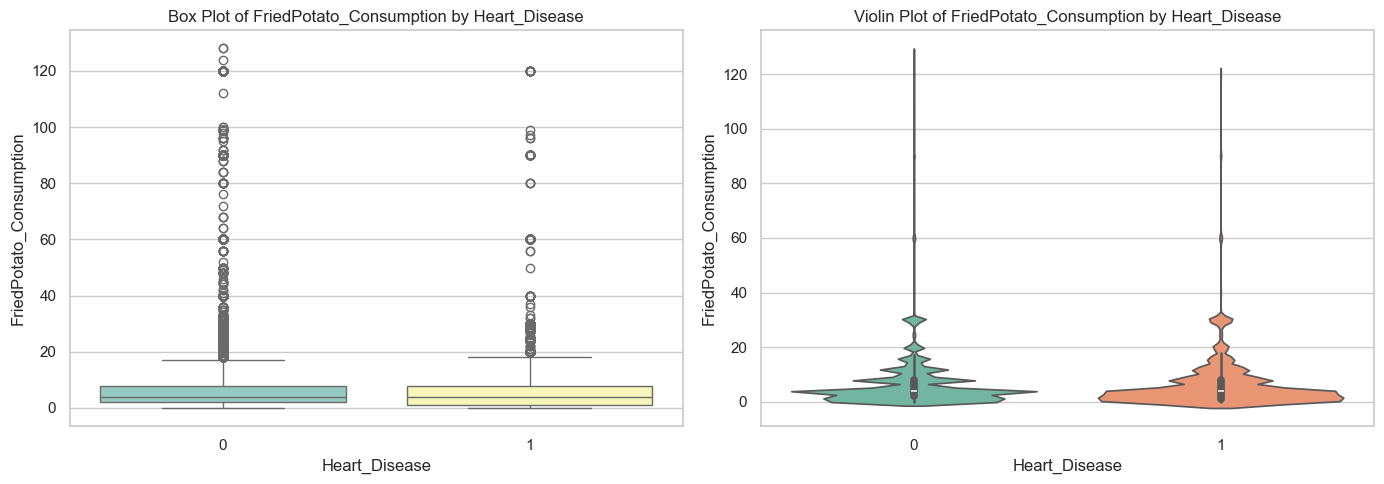


 EDA Summary Table:

                     Feature  Skewness  Median_Diff  Outliers Predictive?
                 Height_(cm)      0.02         3.00      1055       Maybe
                 Weight_(kg)      1.06         2.72      7326         Yes
                         BMI      1.38         1.11      9530         Yes
         Alcohol_Consumption      1.89         1.00     36147         Yes
           Fruit_Consumption      1.25         0.00     68225       Maybe
Green_Vegetables_Consumption      2.42         2.00     11878         Yes
     FriedPotato_Consumption      4.91         0.00     19456       Maybe


In [35]:
from scipy.stats import skew

# Target column
target_col = 'Heart_Disease'

# Placeholder for summary
eda_summary = []

# Set up Seaborn style
sns.set(style="whitegrid")

for col in numeric_cols:
    # Plot boxplot and violin plot
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    sns.boxplot(x=target_col, y=col, data=df, ax=axs[0], palette='Set3')
    axs[0].set_title(f'Box Plot of {col} by {target_col}')

    sns.violinplot(x=target_col, y=col, data=df, ax=axs[1], inner='box', palette='Set2')
    axs[1].set_title(f'Violin Plot of {col} by {target_col}')

    plt.tight_layout()
    plt.show()

    # Basic stats per group
    group_stats = df.groupby(target_col)[col].describe()

    # Median difference
    med_diff = abs(group_stats.loc[1, '50%'] - group_stats.loc[0, '50%'])

    # Skewness
    overall_skew = skew(df[col].dropna())

    # Outlier detection using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

    # Simple heuristic for predictiveness
    if med_diff > 0.5 and abs(overall_skew) > 1:
        predictive_flag = "Yes"
    elif med_diff > 0.5 or abs(overall_skew) > 1:
        predictive_flag = "Maybe"
    else:
        predictive_flag = "No"

    # Append to summary
    eda_summary.append({
        'Feature': col,
        'Skewness': round(overall_skew, 2),
        'Median_Diff': round(med_diff, 2),
        'Outliers': outlier_count,
        'Predictive?': predictive_flag
    })

# Create summary DataFrame
eda_summary_df = pd.DataFrame(eda_summary)
print("\n EDA Summary Table:\n")
print(eda_summary_df.to_string(index=False))
